<a href="https://colab.research.google.com/github/Supersamk13/Machine-Learning-and-Data-Science/blob/main/Data_Science_and_Machine_Learning_Project_Interstate_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Hello, my name is Samuel Kinstlinger. Over the past couple years I have been working on growing my skillset is the fields of data science and machine learing. This is a project I completed early on in my endeavor to practice data cleaning, data preprocessing, data visualization, and implementing regression models. I will be using a data set from Kaggle that gives information on the weather, date and time, and traffic volume.

### Goals
* Answer important questions about interstate traffic and the underlying related factors
* Implement and tune machine learning models to best predict interstate traffic volume

### Outline
* Getting to Know the Data
* EDA
* Treatment/Analysis of Outliers and Missing Data
* Feature Engineering
* Data Cleaning and Transformations
* Answer EDA Questions (Part I)
* Dimensionality Reduction Analysis/Treatment
* Imbalanced Data Analysis/Treatment
* Machine Learning
* Answer EDA Questions (Part II)
* Conclusion

In [1750]:
# Install modules/libraries

# Uncomment below command if starting runtime or this is your first time running this program in this session
# !pip install category_encoders

In [1751]:
# Import modules/libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import category_encoders as ce
%matplotlib inline

In [1752]:
# Set up data frame
url='https://github.com/Supersamk13/Machine-Learning-and-Data-Science/raw/main/Metro_Interstate_Traffic_Volume%5B1%5D.csv'
traffic_df=pd.read_csv(url)

# Getting to Know the Data
* Understanding feature data types and information

In [1753]:
# Getting to Know the Data
print(traffic_df.head())
print(traffic_df.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [1754]:
print(traffic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


* All data is non-null; no need to fill or remove missing values
* If there were missing data, I would either remove it if it was negligible or do some KNN imputation to fill it in otherwise (or a superior model)

In [1755]:
for index in range(traffic_df.shape[1]):
  print(traffic_df.columns[index])
  print(traffic_df.iloc[:,index].unique())

holiday
['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']
temp
[288.28 289.36 289.58 ... 306.08 304.41 304.9 ]
rain_1h
[0.0000e+00 2.5000e-01 5.7000e-01 3.8000e-01 3.0000e-01 2.9000e-01
 4.4000e-01 3.6000e-01 2.1600e+00 3.3900e+00 8.4000e-01 7.6000e-01
 5.1000e-01 6.9000e-01 1.0000e+00 1.2900e+00 1.3400e+00 1.8400e+00
 1.7000e+00 4.7000e-01 1.4100e+00 1.4400e+00 7.0000e-01 3.1800e+00
 6.1000e-01 6.4000e-01 1.0200e+00 5.4200e+00 8.6400e+00 5.7400e+00
 4.9800e+00 3.6500e+00 6.8000e-01 4.6000e-01 4.2000e-01 1.5200e+00
 8.9000e-01 1.4000e+00 1.2190e+01 2.2900e+00 7.5400e+00 6.9400e+00
 1.6380e+01 1.7800e+00 2.5400e+00 9.1400e+00 3.0500e+00 1.6500e+00
 4.4450e+01 3.8100e+00 5.8400e+00 3.5600e+00 7.3700e+00 1.3500e+00
 1.6000e+01 1.0540e+01 1.2700e+00 5.0800e+00 1.9900e+01 2.5320e+01
 2.1420e+01 5.5900e+00 7.1100e+00 5.9700e+00 9.5300e+00 2.0

In [1756]:
# Stats about each numeric feature
print(traffic_df.describe())

               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000


In [1757]:
# Stats about each categorical feature
print(traffic_df.describe(include='object'))

       holiday weather_main weather_description            date_time
count    48204        48204               48204                48204
unique      12           11                  38                40575
top       None       Clouds        sky is clear  2013-05-19 10:00:00
freq     48143        15164               11665                    6


* holiday is very imbalanced towards no holiday
* holiday and weather_main have a small amount of categories making One-Hot Encoding a viable option for some models (maybe also weather_description)
* For date_time, second is most likely unimportant; note to compare model performance including second vs. excluding second
* Above comment may also be applicable for minute
* date_time may be tricky for parametric models as it requires nuance for analysis


### Feature Conclusions
* holiday- Categorical, US National holidays plus regional holidays
* temp- Numeric, Average temp in kelvin
* rain_1h- Numeric, Amount in mm of rain that occurred in the hour
* snow_1h- Numeric, Amount in mm of snow that occurred in the hour
* clouds_all- Numeric, Percentage of cloud cover
* weather_main- Categorical, Short textual description of the current weather
* weather_description- Categorical, Longer textual description of the current weather
* date_time- DateTime, Hour of the data collected in local CST time
* traffic_volume- Numeric Hourly I-94 ATR 301 reported westbound traffic volume



### Other Data Info
* Shape = (48204, 9)
* Traffic is westbound
* Traffic is between Saint Paul and Minneapolis
* Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume. Collected from 2012-2018.

# EDA
* What are the best weather indicators of heavy traffic?
* During which time of day is traffic the heaviest? (hours and day vs. night)?
* During which time of the year if traffic the heaviest (months and winter vs. summer)?
* Which holidays lead to the most traffic?
* How has traffic volume changed over the years?
* Which day(s) of the week have the most and least traffic?
* Is there more traffic on the weekend or weekdays?


# Noise Data and Structural Error Analysis/Treatment

In [1758]:
traffic_df['weather_description']=traffic_df['weather_description'].apply(lambda x: x.lower())

# Treatment/Analysis of Outliers and Missing Data
* Eliminate outliers (use boxplot and pandas statistical describe function as metrics)
* I am making each data visualization plot to help me in data preprocessing and feature engineering.
* I would make them significantly more user-friendly and communication-oriented if they were meant to be presented or shown to those who are not very familiar with the data.

## Remove Outliers

* Outliers appear to be heavily skewing the feature data
* Due to there being a small amount of outliers and large amount of data, removing the outliers is a viable choice

### traffic_volume

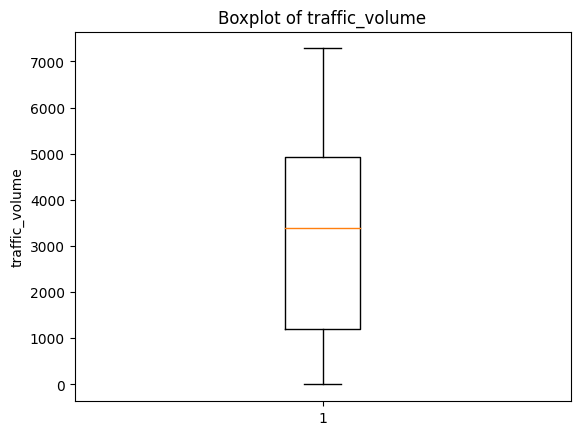

In [1759]:
# Boxplot
plt.boxplot(traffic_df['traffic_volume'])

# Add labels
plt.title('Boxplot of traffic_volume')
plt.ylabel('traffic_volume')

plt.show()

In [1760]:
# Stats about each numeric feature
print(traffic_df['traffic_volume'].describe())

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


No apparent outliers

### temp

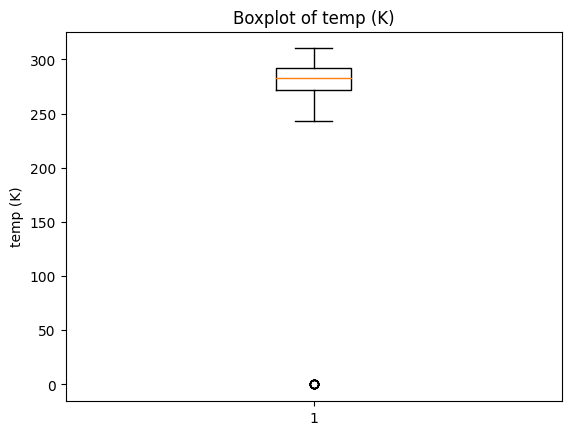

In [1761]:
# Boxplot
plt.boxplot(traffic_df['temp'])

# Add labels
plt.title('Boxplot of temp (K)')
plt.ylabel('temp (K)')

plt.show()

In [1762]:
# Stats about each numeric feature
print(traffic_df['temp'].describe())

count    48204.000000
mean       281.205870
std         13.338232
min          0.000000
25%        272.160000
50%        282.450000
75%        291.806000
max        310.070000
Name: temp, dtype: float64


Remove outlier at 0 (most likely false entry/mistake)

In [1763]:
# Remove outliers
traffic_df=traffic_df[np.absolute(stats.zscore(traffic_df['temp']))<3]

Recheck data

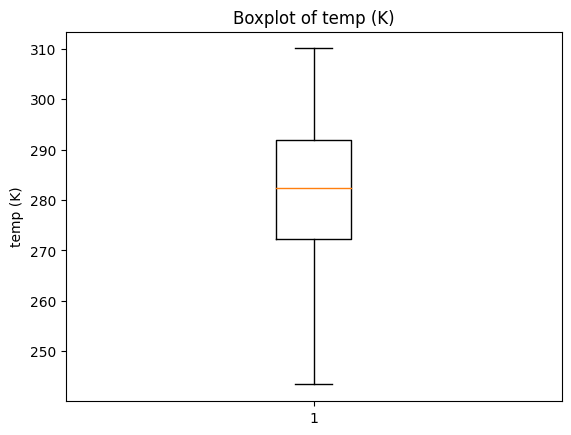

In [1764]:
# Boxplot
plt.boxplot(traffic_df['temp'])

# Add labels
plt.title('Boxplot of temp (K)')
plt.ylabel('temp (K)')

plt.show()

In [1765]:
# Stats about each numeric feature
print(traffic_df['temp'].describe())

count    48194.000000
mean       281.264219
std         12.709587
min        243.390000
25%        272.182500
50%        282.460000
75%        291.810000
max        310.070000
Name: temp, dtype: float64


No apparent outliers

### clouds_all

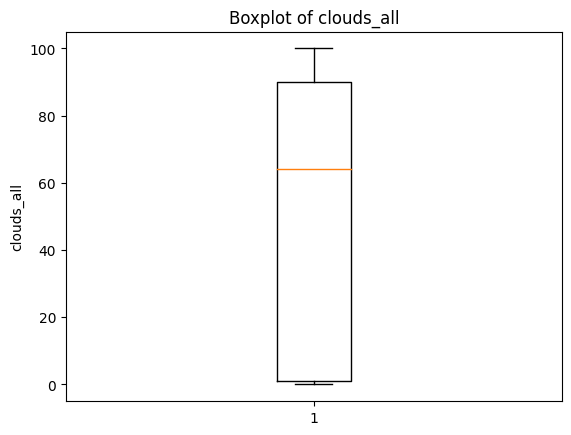

In [1766]:
# Boxplot
plt.boxplot(traffic_df['clouds_all'])

# Add labels
plt.title('Boxplot of clouds_all')
plt.ylabel('clouds_all')

plt.show()

In [1767]:
# Stats about each numeric feature
print(traffic_df['clouds_all'].describe())

count    48194.000000
mean        49.372474
std         39.013317
min          0.000000
25%          1.000000
50%         64.000000
75%         90.000000
max        100.000000
Name: clouds_all, dtype: float64


No apparent outliers

### rain_1h

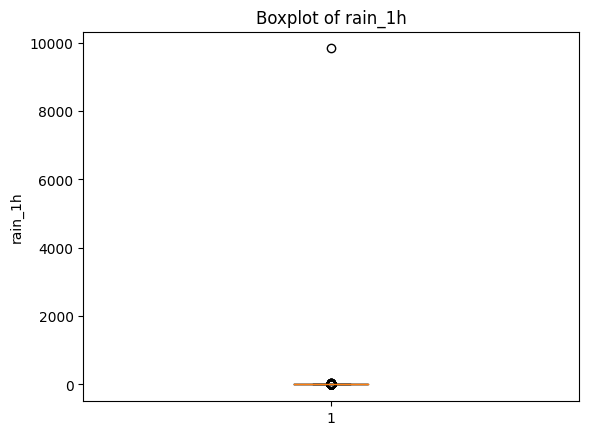

In [1768]:
# Boxplot
plt.boxplot(traffic_df['rain_1h'])

# Add labels
plt.title('Boxplot of rain_1h')
plt.ylabel('rain_1h')

plt.show()

In [1769]:
# Stats about each numeric feature
print(traffic_df['rain_1h'].describe())

count    48194.000000
mean         0.334333
std         44.793779
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9831.300000
Name: rain_1h, dtype: float64


Some apparent outlier

In [1770]:
# Remove outliers
traffic_df=traffic_df[np.absolute(stats.zscore(traffic_df['rain_1h']))<.9]

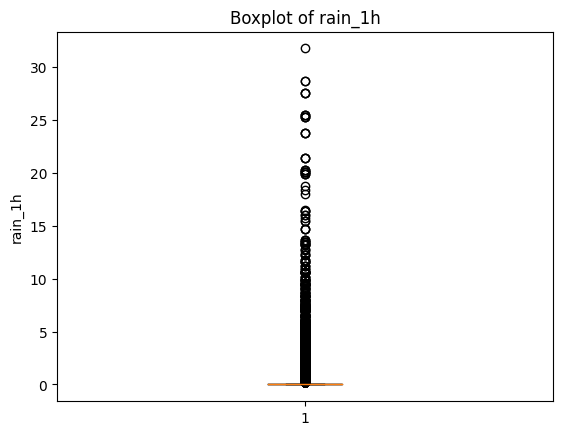

In [1771]:
# Boxplot
plt.boxplot(traffic_df['rain_1h'])

# Add labels
plt.title('Boxplot of rain_1h')
plt.ylabel('rain_1h')

plt.show()

In [1772]:
# Stats about each numeric feature
print(traffic_df['rain_1h'].describe())

count    48191.000000
mean         0.128270
std          0.949912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.750000
Name: rain_1h, dtype: float64


Data has no apparent harmful or misleading outliers; deal with zero-inflation later

### snow_1h

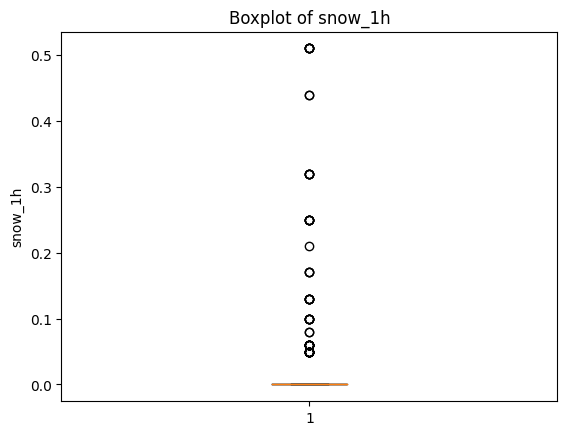

In [1773]:
# Boxplot
plt.boxplot(traffic_df['snow_1h'])

# Add labels
plt.title('Boxplot of snow_1h')
plt.ylabel('snow_1h')

plt.show()

In [1774]:
# Stats about each numeric feature
print(traffic_df['snow_1h'].describe())

count    48191.000000
mean         0.000222
std          0.008169
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: snow_1h, dtype: float64


Data has no apparent harmful or misleading outliers; deal with zero-inflation later

* Eliminate skew in numerical features and target (use histogram, pandas statistical describe function, and pandas skew function as metrics)
* Finally normalize each numerical feature

# Feature Engineering

### rain_1h

I figure that the way I handle both rain_1h and snow_1h will be the same. I have to deal with zero-inflated non-negative variables with true zeros. This rules out tobit regression and data transformations. After a long time researching and contemplating different approaches, I have to add an discretized rain_1h and snow_1h to my data. I will now have a continuous and discrete feature for both rain_1h and snow_1h. I will either use the continuous features or the discretized features depending on the machine learning algorithm.


I will then attempt to reduce the skew slightly by applying a transformation

I could have done a two-part model and separated the data sets. I am still learning how to do that, so this will have to suffice for now.

In [1775]:
# Stats about each numeric feature
print(traffic_df['rain_1h'].describe())

count    48191.000000
mean         0.128270
std          0.949912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.750000
Name: rain_1h, dtype: float64


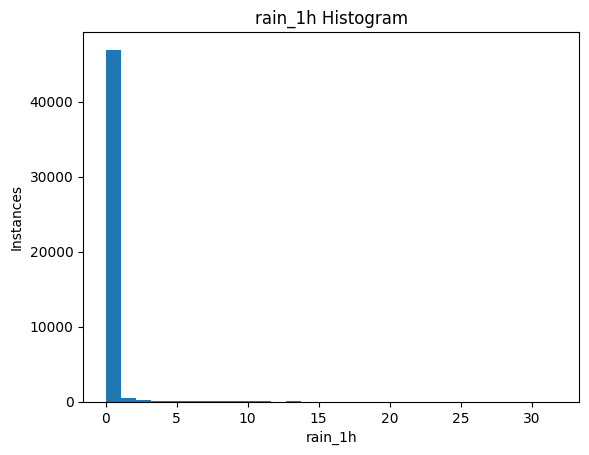

<Figure size 1000x600 with 0 Axes>

In [1776]:
# Histogram
plt.hist(traffic_df['rain_1h'], bins=30)

# Labels
plt.xlabel('rain_1h')
plt.ylabel('Instances')
plt.title('rain_1h Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

Significant right skew due to zero-inflation

In [1777]:
# From outside research about rain- 0-->None(0), 0<Light(1)<=2.5, 2.5<Medium(2)<=8, 8<Heavy(3)
traffic_df['rain_1h_bin']=traffic_df['rain_1h'].apply(lambda x: 0 if x==0 else 1 if x<=2.5 else 2 if x<=8 else 3)

In [1778]:
# Stats about each numeric feature
print(traffic_df['rain_1h'].describe())

count    48191.000000
mean         0.128270
std          0.949912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.750000
Name: rain_1h, dtype: float64


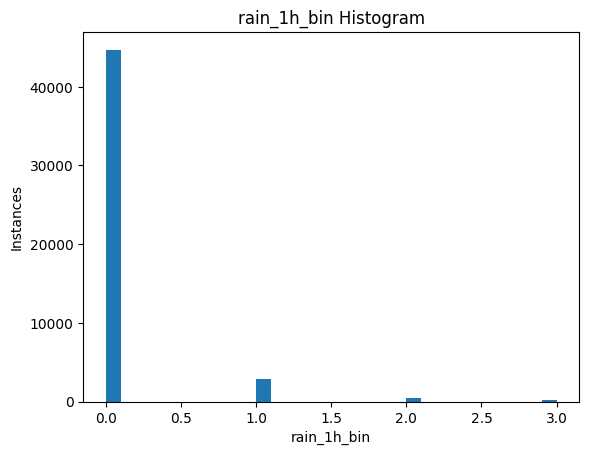

<Figure size 1000x600 with 0 Axes>

In [1779]:
# Histogram
plt.hist(traffic_df['rain_1h_bin'], bins=30)

# Labels
plt.xlabel('rain_1h_bin')
plt.ylabel('Instances')
plt.title('rain_1h_bin Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

Improved

### snow_1h

In [1780]:
# Stats about each numeric feature
print(traffic_df['snow_1h'].describe())

count    48191.000000
mean         0.000222
std          0.008169
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: snow_1h, dtype: float64


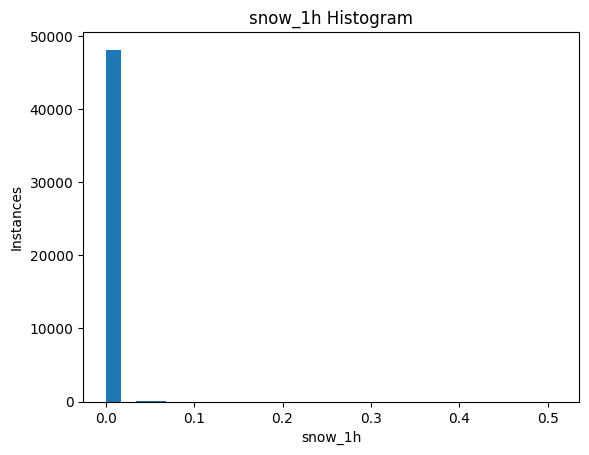

<Figure size 1000x600 with 0 Axes>

In [1781]:
# Histogram
plt.hist(traffic_df['snow_1h'], bins=30)

# Labels
plt.xlabel('snow_1h')
plt.ylabel('Instances')
plt.title('snow_1h Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

Significant right skew due to zero-inflation

In [1782]:
# From outside research about snow
traffic_df['snow_1h_bin']=traffic_df['snow_1h'].apply(lambda x: 0 if x==0 else 1 if x<=.2 else 2)

In [1783]:
# Stats about each numeric feature
print(traffic_df['snow_1h_bin'].describe())

count    48191.000000
mean         0.001722
std          0.050492
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: snow_1h_bin, dtype: float64


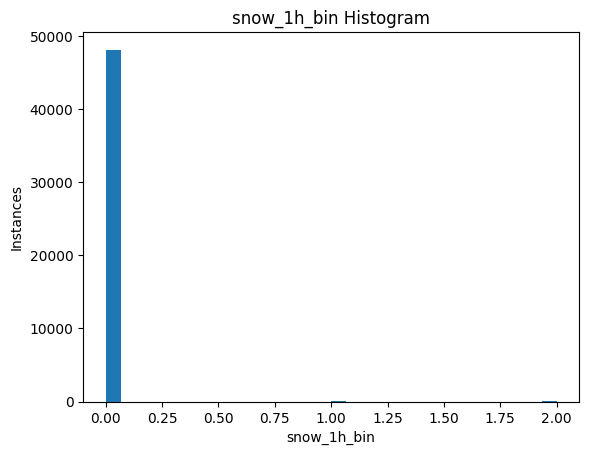

<Figure size 1000x600 with 0 Axes>

In [1784]:
# Histogram
plt.hist(traffic_df['snow_1h_bin'], bins=30)

# Labels
plt.xlabel('snow_1h_bin')
plt.ylabel('Instances')
plt.title('snow_1h_bin Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

Improved

### Weather
* Currently there are two weather columns: simple description (weather_main) and complex description (weather_description). The simple description is essentially an umbrella term for certain complex descriptions. I will feature engineer the weather to one column, then use binary encoding to turn the data into numerical.

In [1785]:
print(traffic_df['weather_main'].unique())

['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


In [1786]:
print(traffic_df['weather_description'].unique())

['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'squalls'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'very heavy rain' 'thunderstorm with light drizzle'
 'light snow' 'thunderstorm with drizzle' 'smoke' 'shower drizzle'
 'light shower snow' 'sleet']


Due to weather_description containing weather_main with more information, I have decided to remove weather_main

In [1787]:
# To delete weather_main
traffic_df=traffic_df.drop('weather_main', axis=1)

I will now attempt to reduce the cardinality of weather_description

I will combine weather_descriptions into groups based on similarity in other dataset features

I will group the data based on their weather_description categories.

Then I will use the pandas aggregate function to see mean values of other numerical features in the dataset for each category in weather_description

In [1788]:
print(traffic_df.groupby('weather_description').aggregate({'temp':[np.mean,np.size],'rain_1h':np.mean, 'snow_1h':np.mean, 'clouds_all':np.mean, 'traffic_volume':np.mean}))

                                           temp           rain_1h   snow_1h  \
                                           mean   size       mean      mean   
weather_description                                                           
broken clouds                        281.188939   4666   0.000000  0.000000   
drizzle                              283.005776    651   0.118710  0.000000   
few clouds                           284.128469   1956   0.000000  0.000000   
fog                                  279.415713    912   0.087007  0.000625   
freezing rain                        272.860000      2   0.000000  0.000000   
haze                                 275.818581   1360   0.046868  0.000000   
heavy intensity drizzle              285.116406     64   0.170156  0.000000   
heavy intensity rain                 290.326981    467   2.656660  0.000000   
heavy snow                           269.155536    616   0.001234  0.000000   
light intensity drizzle              284.246327   11

Percentage of cloud cover, quantity of rain, and quantity of snow have already ben accounted for

I will group those with an important feature being percentage of cloud cover, quantity of rain, and quantity of snow into cloudy, rain, snow, respectively

In [1789]:
# Replace weather_description
traffic_df['weather_description']=traffic_df['weather_description'].apply(lambda x: 'rain' if x in ['freezing rain', 'drizzle','heavy intensity drizzle', 'heavy intensity rain', 'light intensity drizzle', 'light intensity shower rain', 'light rain', 'moderate rain', 'proximity shower rain', 'shower drizzle', 'very heavy rain']
                                                                          else 'cloudy' if x.__contains__('cloud')
                                                                          else 'snow' if x.__contains__('snow') or x=='sleet'
                                                                          else 'thunderstorm' if x.__contains__('thunderstorm') or x=='squalls'
                                                                          else 'sky is clear' if x=='smoke'
                                                                          else x)

In [1790]:
print(traffic_df.groupby('weather_description').aggregate({'temp':[np.mean,np.size],'rain_1h':np.mean, 'snow_1h':np.mean, 'clouds_all':np.mean, 'traffic_volume':np.mean}))

                           temp          rain_1h   snow_1h clouds_all  \
                           mean   size      mean      mean       mean   
weather_description                                                     
cloudy               281.466101  15164  0.000000  0.000000  64.056120   
fog                  279.415713    912  0.087007  0.000625  51.497807   
haze                 275.818581   1360  0.046868  0.000000  58.670588   
mist                 279.476892   5950  0.238336  0.000728  65.956303   
rain                 286.201958   7490  0.439733  0.000142  74.962750   
sky is clear         281.714107  13401  0.000787  0.000000   1.625177   
snow                 267.955188   2876  0.025223  0.001655  81.465229   
thunderstorm         292.715164   1038  1.198083  0.000000  68.544316   

                    traffic_volume  
                              mean  
weather_description                 
cloudy                 3618.449749  
fog                    2703.720395  
haze       

Binary Encode weather_description

In [1791]:
# Duplicate weather_description colume for future EDA
traffic_df['weather_description_']=traffic_df['weather_description']

In [1792]:
traffic_df=encoder.fit_transform(traffic_df)

In [1793]:
print(traffic_df.tail(10))

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_description_0  \
48194    None  283.84     0.00      0.0          75                      0   
48195    None  283.84     0.00      0.0          75                      0   
48196    None  284.38     0.00      0.0          75                      0   
48197    None  284.79     0.00      0.0          75                      0   
48198    None  284.20     0.25      0.0          75                      0   
48199    None  283.45     0.00      0.0          75                      0   
48200    None  282.76     0.00      0.0          90                      0   
48201    None  282.73     0.00      0.0          90                      0   
48202    None  282.09     0.00      0.0          90                      0   
48203    None  282.12     0.00      0.0          90                      0   

       weather_description_1  weather_description_2  weather_description_3  \
48194                      0                      1            

### DateTime

In [1794]:
traffic_df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_description_0', 'weather_description_1',
       'weather_description_2', 'weather_description_3', 'date_time',
       'traffic_volume', 'rain_1h_bin', 'snow_1h_bin', 'weather_description_'],
      dtype='object')

Criteria for Pandas Skew Function

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed

### traffic_volume

In [1795]:
# Stats about each numeric feature
print(traffic_df['traffic_volume'].describe())

count    48191.000000
mean      3260.203150
std       1986.737523
min          0.000000
25%       1194.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


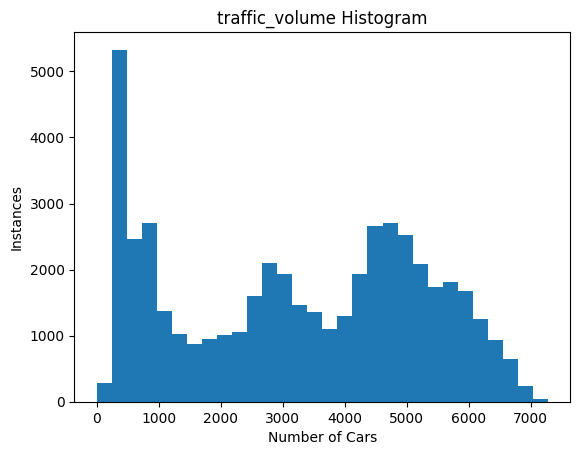

<Figure size 1000x600 with 0 Axes>

In [1796]:
# Histogram
plt.hist(traffic_df['traffic_volume'], bins=30)

# Labels
plt.xlabel('Number of Cars')
plt.ylabel('Instances')
plt.title('traffic_volume Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

In [1797]:
# Testing skew
print(pd.DataFrame(traffic_df['traffic_volume']).skew(axis=0, numeric_only='True'))

traffic_volume   -0.089602
dtype: float64


Data has no significant skew

### temp

In [1798]:
# Stats about each numeric feature
print(traffic_df['temp'].describe())

count    48191.000000
mean       281.263322
std         12.709405
min        243.390000
25%        272.180000
50%        282.460000
75%        291.808000
max        310.070000
Name: temp, dtype: float64


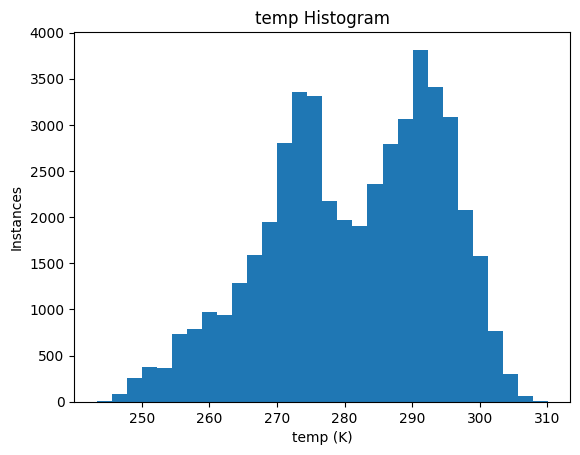

<Figure size 1000x600 with 0 Axes>

In [1799]:
# Histogram
plt.hist(traffic_df['temp'], bins=30)

# Labels
plt.xlabel('temp (K)')
plt.ylabel('Instances')
plt.title('temp Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

There appears to be left-skew in the histogram, I applied exp, cube, and square transformations. Cube transformation performed best.

In [1800]:
# Cube Transformation
traffic_df['temp']=np.power(traffic_df['temp'], 3)

In [1801]:
# Stats about each numeric feature
print(traffic_df['temp'].describe())

count    4.819100e+04
mean     2.238602e+07
std      2.975135e+06
min      1.441811e+07
25%      2.016363e+07
50%      2.253569e+07
75%      2.484801e+07
max      2.981119e+07
Name: temp, dtype: float64


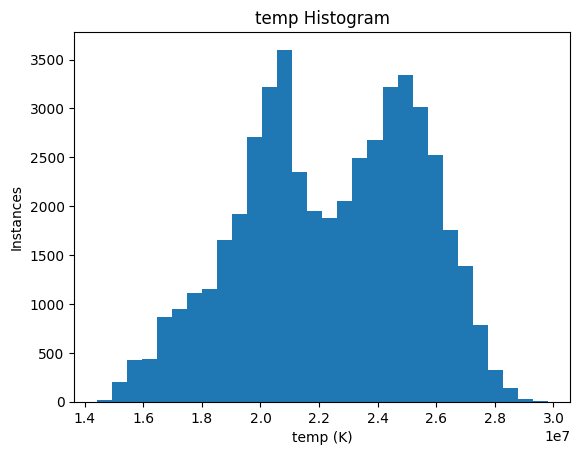

<Figure size 1000x600 with 0 Axes>

In [1802]:
# Histogram
plt.hist(traffic_df['temp'], bins=30)

# Labels
plt.xlabel('temp (K)')
plt.ylabel('Instances')
plt.title('temp Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

In [1803]:
# Testing skew
print(traffic_df['temp'].skew(axis=0, numeric_only='True'))

-0.20316910175989186


### clouds_all

In [1804]:
# Stats about each numeric feature
print(traffic_df['clouds_all'].describe())

count    48191.000000
mean        49.371003
std         39.014076
min          0.000000
25%          1.000000
50%         64.000000
75%         90.000000
max        100.000000
Name: clouds_all, dtype: float64


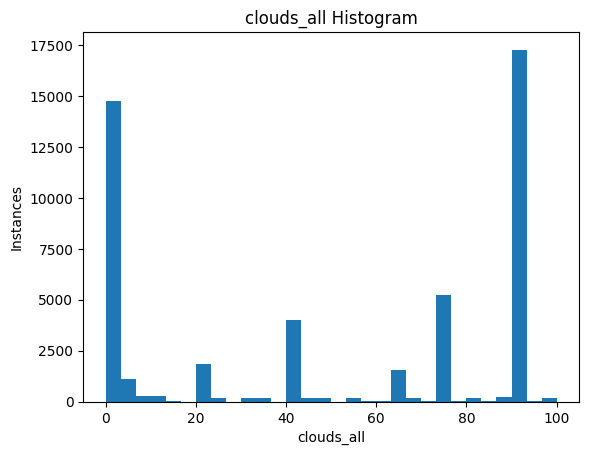

<Figure size 1000x600 with 0 Axes>

In [1805]:
# Histogram
plt.hist(traffic_df['clouds_all'], bins=30)

# Labels
plt.xlabel('clouds_all')
plt.ylabel('Instances')
plt.title('clouds_all Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

In [1806]:
# Testing skew
print(pd.DataFrame(traffic_df['clouds_all']).skew(axis=0, numeric_only='True'))

clouds_all   -0.197604
dtype: float64


No significant skew

### rain_1h

In [1807]:
# Stats about each numeric feature
print(traffic_df['rain_1h'].describe())

count    48191.000000
mean         0.128270
std          0.949912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.750000
Name: rain_1h, dtype: float64


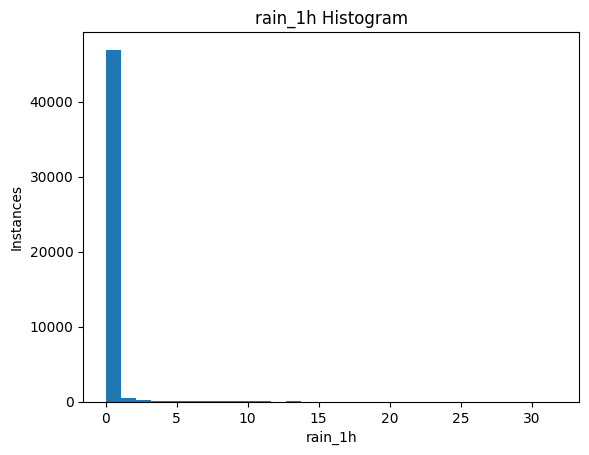

<Figure size 1000x600 with 0 Axes>

In [1808]:
# Histogram
plt.hist(traffic_df['rain_1h'], bins=30)

# Labels
plt.xlabel('rain_1h')
plt.ylabel('Instances')
plt.title('rain_1h Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

In [1809]:
# Testing skew
print(pd.DataFrame(traffic_df['rain_1h']).skew(axis=0, numeric_only='True'))

rain_1h    15.096753
dtype: float64


Significant right skew due to zero-inflation

In [1810]:
# Tranforming rain_1h to Minimize Right Skew
traffic_df['rain_1h']=traffic_df['rain_1h'].apply(lambda x: x+1)
traffic_df['rain_1h']=np.log(traffic_df['rain_1h'])

In [1811]:
# Stats about each numeric feature
print(traffic_df['rain_1h'].describe())

count    48191.000000
mean         0.053800
std          0.257578
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.488903
Name: rain_1h, dtype: float64


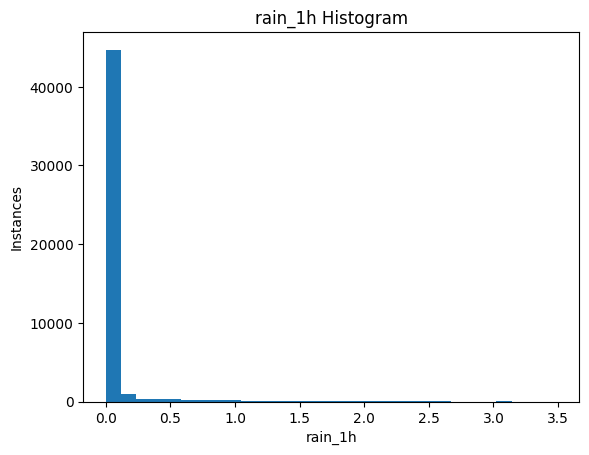

<Figure size 1000x600 with 0 Axes>

In [1812]:
# Histogram
plt.hist(traffic_df['rain_1h'], bins=30)

# Labels
plt.xlabel('rain_1h')
plt.ylabel('Instances')
plt.title('rain_1h Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

In [1813]:
# Testing skew
print(pd.DataFrame(traffic_df['rain_1h']).skew(axis=0, numeric_only='True'))

rain_1h    6.552472
dtype: float64


Improved

### snow_1h

In [1814]:
# Stats about each numeric feature
print(traffic_df['snow_1h'].describe())

count    48191.000000
mean         0.000222
std          0.008169
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.510000
Name: snow_1h, dtype: float64


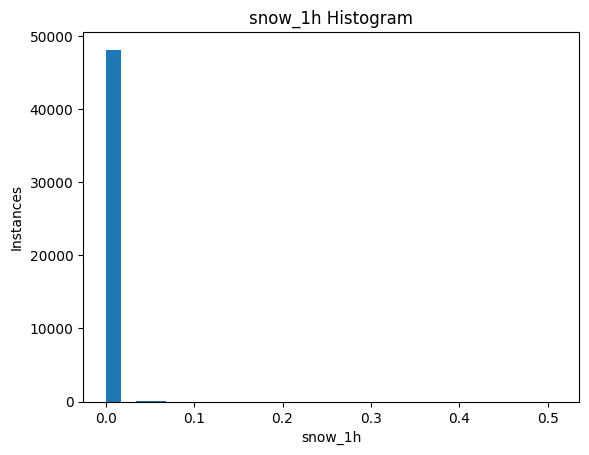

<Figure size 1000x600 with 0 Axes>

In [1815]:
# Histogram
plt.hist(traffic_df['snow_1h'], bins=30)

# Labels
plt.xlabel('snow_1h')
plt.ylabel('Instances')
plt.title('snow_1h Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

In [1816]:
# Testing skew
print(pd.DataFrame(traffic_df['snow_1h']).skew(axis=0, numeric_only='True'))

snow_1h    48.360955
dtype: float64


Significant right skew due to zero-inflation

In [1817]:
# Tranforming to Minimize Right Skew
traffic_df['snow_1h']=traffic_df['snow_1h'].apply(lambda x: x+1)
traffic_df['snow_1h']=np.log(traffic_df['snow_1h'])

In [1818]:
# Stats about each numeric feature
print(traffic_df['snow_1h'].describe())

count    48191.000000
mean         0.000196
std          0.006920
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.412110
Name: snow_1h, dtype: float64


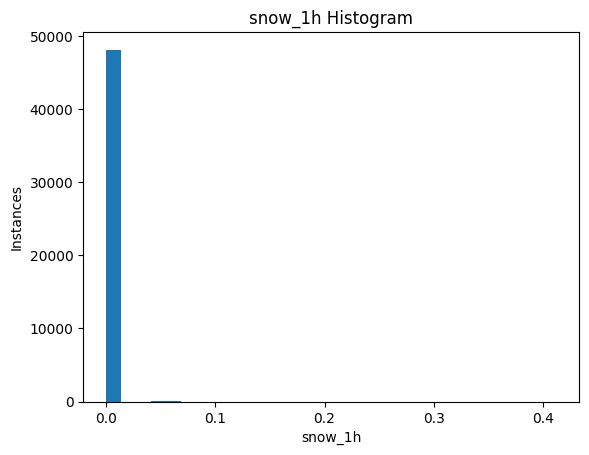

<Figure size 1000x600 with 0 Axes>

In [1819]:
# Histogram
plt.hist(traffic_df['snow_1h'], bins=30)

# Labels
plt.xlabel('snow_1h')
plt.ylabel('Instances')
plt.title('snow_1h Histogram')

# Manipulate figure size
plt.figure(figsize=(10,6))

# Show plot
plt.show()

In [1820]:
# Testing skew
print(pd.DataFrame(traffic_df['snow_1h']).skew(axis=0, numeric_only='True'))

snow_1h    45.643806
dtype: float64


Improved

#### Normalize Features

To make them conform to the same scale and improve the performance of certain models

No need to recheck desired aspects of features as they are all preserved when the features are normalized

In [1821]:
myColumns=['traffic_volume', 'temp', 'clouds_all', 'rain_1h', 'snow_1h']
for column in myColumns:
  # Normalizing
  traffic_df[column]=(traffic_df[column]-traffic_df[column].min())/(traffic_df[column].max()-traffic_df[column].min())

# Categorical Features